# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [1]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd D:\OneDrive - Hanoi University of Science and Technology\HUST classes\ml_thaylinh\course_code\Hw2

D:\OneDrive - Hanoi University of Science and Technology\HUST classes\ml_thaylinh\course_code\Hw2


In [3]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [4]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [5]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
df = pd.DataFrame(newdf)
df_f5 = df.head(5)
print(df_f5.info)
print(df_f5.describe)

<bound method DataFrame.info of          id month                     project  \
0  28086120    12  Vinhomes Smart City Đại Mỗ   
1  28088954    12               Goldmark City   
2  28097966    12        Chung cư IEC Tứ Hiệp   
3  27895887    12         Vinhomes D'Capitale   
4  28056031    12           The Zen Residence   

                                            investor  square  bedrooms  \
0                                  Tập đoàn Vingroup    60.0       3.0   
1  Công ty TNHH Thương mại - Quảng cáo - Xây dựng...   121.0       3.0   
2                                                NaN    70.0       2.0   
3                               Tân Hoàng Minh Group    39.0       1.0   
4                  Công ty TNHH Gamuda Land Việt Nam    97.0       3.0   

   bathrooms direction   balcony     district        ward   price  
0        1.0  Đông-Nam   Tây-Bắc  nam tu liem      dai mo  1560.0  
1        2.0       NaN       NaN  bac tu liem    phu dien  3300.0  
2        2.0   Tây-Bắc  

Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

<Axes: xlabel='price'>

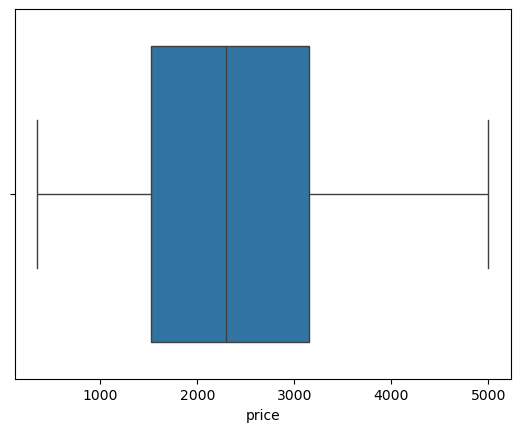

In [6]:
#Code for 'price' field
sns.boxplot(x = df["price"])

<Axes: xlabel='square'>

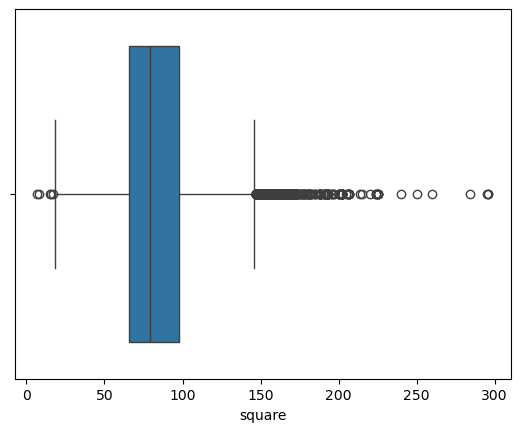

In [7]:
#Code for 'square' field
sns.boxplot(x = df["square"])

<Axes: xlabel='bedrooms'>

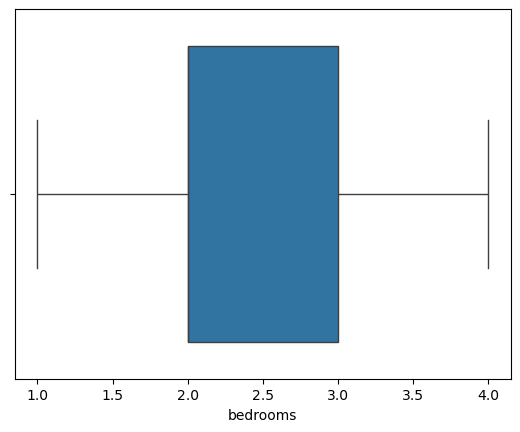

In [8]:
#Code for 'bedrooms' field
sns.boxplot(x = df["bedrooms"])

<Axes: xlabel='bathrooms'>

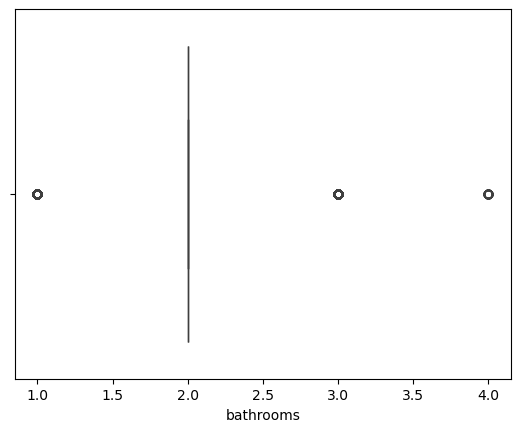

In [9]:
#Code for 'bathrooms' field
sns.boxplot(x = df["bathrooms"])

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

C:\Users\ACER\AppData\Local\Temp\ipykernel_1732\1920162332.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


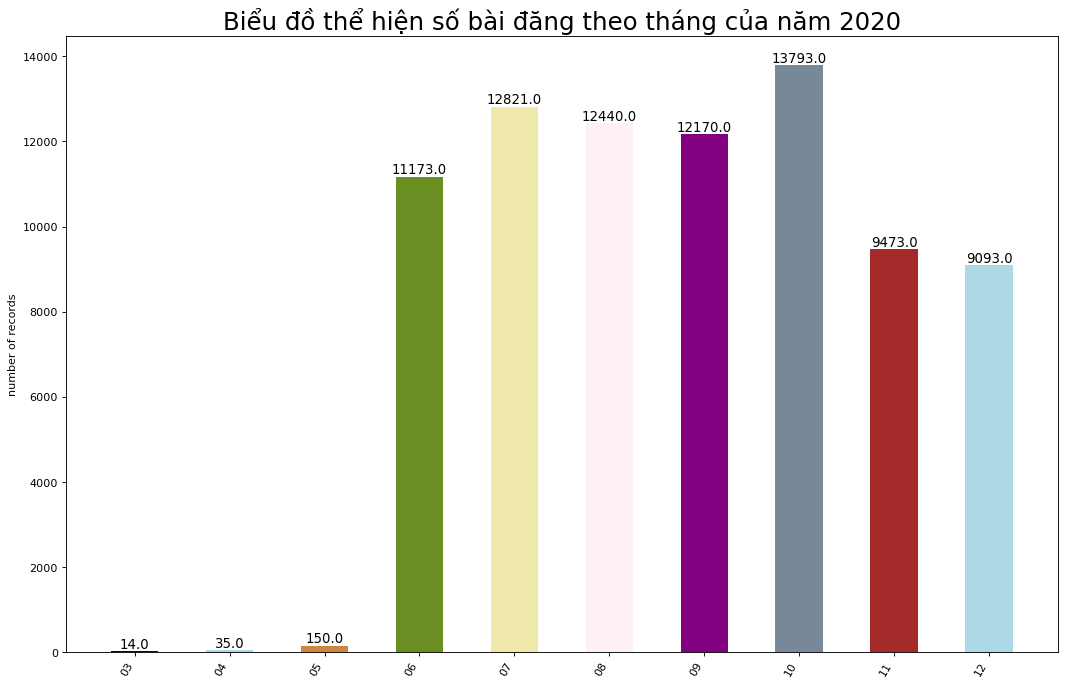

In [10]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1732\1312177954.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment='right')


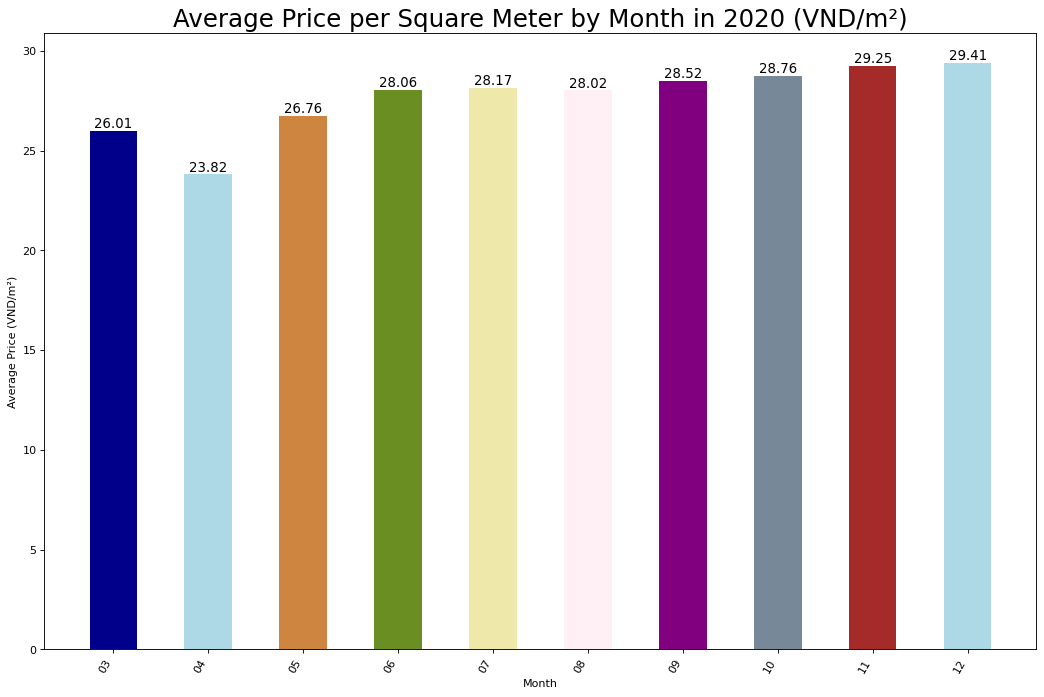

In [15]:
#Code ở đây
newdf['price_per_m2'] = newdf['price'] / newdf['square']
df2 = newdf.groupby('month')['price_per_m2'].mean().reset_index(name='average price (VND/m²)')

n = df2['month'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16, 10), dpi=80)
plt.bar(df2['month'], df2['average price (VND/m²)'], color=c, width=0.5)

for i, val in enumerate(df2['average price (VND/m²)'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 12})
    
plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment='right')

plt.title("Average Price per Square Meter by Month in 2020 (VND/m²)", fontsize=22)
plt.ylabel('Average Price (VND/m²)')
plt.xlabel('Month')

plt.show()



* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

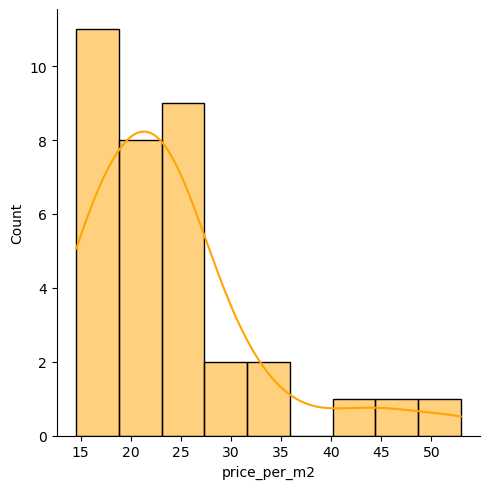

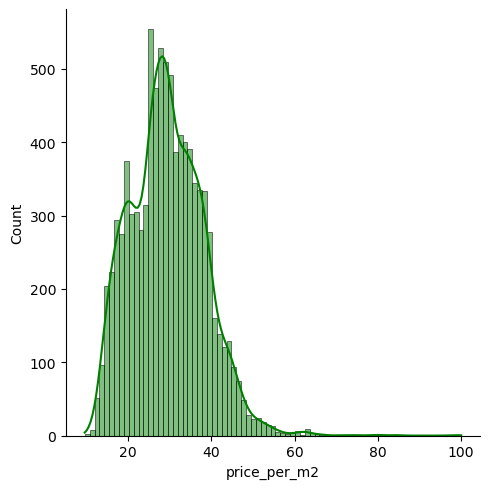

In [27]:
#Gọi ý: sns.displot()

apr = newdf[newdf['month'] == '04']
dec = newdf[newdf['month'] == '12']

sns.displot(apr['price_per_m2'], kde = True, color = 'orange')
sns.displot(dec['price_per_m2'], kde = True, color = 'green')


plt.show()


* Số lượng bất động sản phân theo số lượng bedrooms

* Giá bất động sản trung bình theo số lượng bedrooms

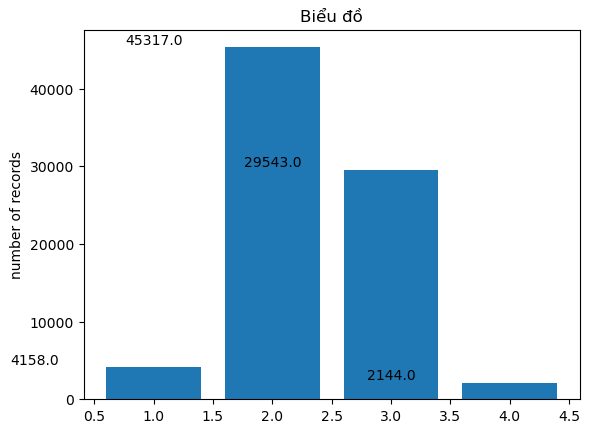

In [17]:
#Code ở đây

dfb = newdf.groupby('bedrooms').size().reset_index(name='num of bedrooms')

plt.bar(dfb['bedrooms'], dfb['num of bedrooms'])
for i, val in enumerate(dfb['num of bedrooms'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom')

plt.title("Biểu đồ")
plt.ylabel('number of records')
plt.show()



C:\Users\ACER\AppData\Local\Temp\ipykernel_1732\3955041629.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['bedrooms'], rotation=60, horizontalalignment='right')


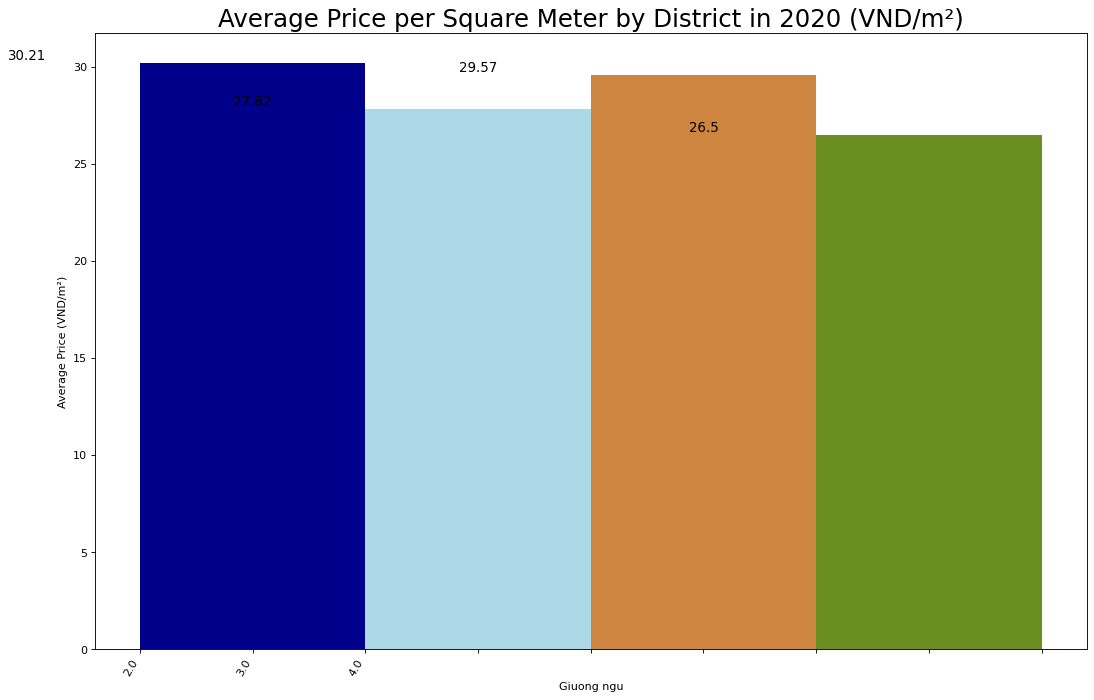

In [20]:
# Code ở đây
df2 = newdf.groupby('bedrooms')['price_per_m2'].mean().reset_index(name='average price (VND/m²)')

n = df2['bedrooms'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16, 10), dpi=80)
plt.bar(df2['bedrooms'], df2['average price (VND/m²)'], color=c, width=1)

for i, val in enumerate(df2['average price (VND/m²)'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 12})
    
plt.gca().set_xticklabels(df2['bedrooms'], rotation=60, horizontalalignment='right')

plt.title("Average Price per Square Meter by District in 2020 (VND/m²)", fontsize=22)
plt.ylabel('Average Price (VND/m²)')
plt.xlabel('Giuong ngu')

plt.show()


* Giá nhà đất trung bình theo quận (VND/m2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1732\2024798654.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['district'], rotation=60, horizontalalignment='right')


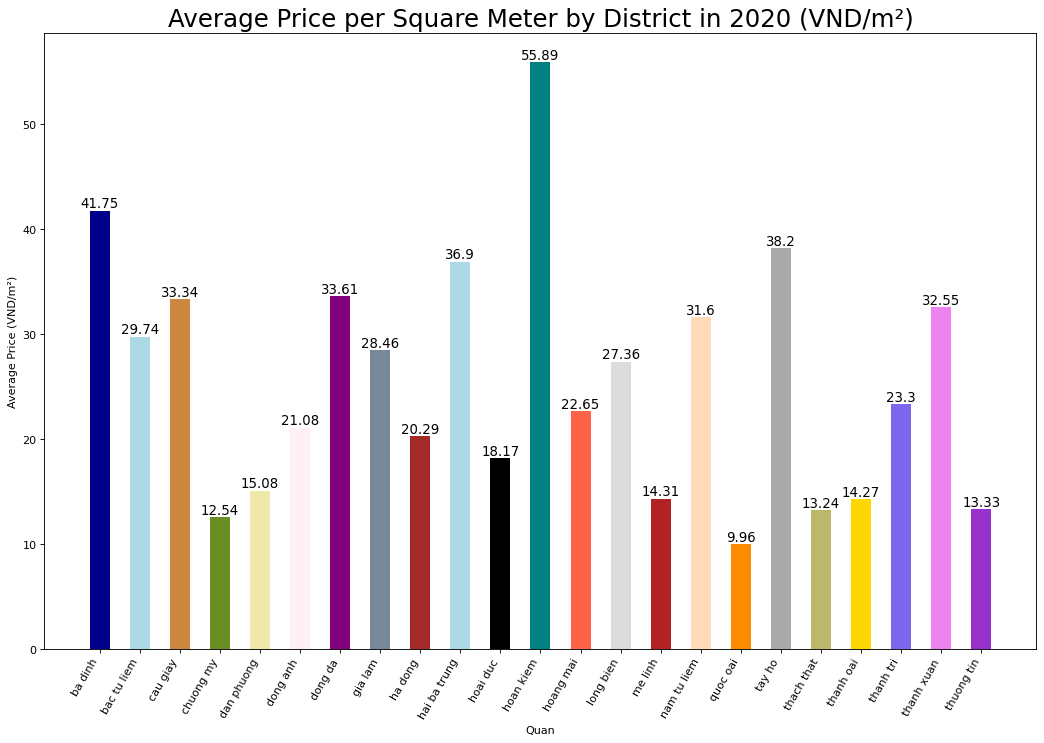

In [21]:
# Code ở đây
df2 = newdf.groupby('district')['price_per_m2'].mean().reset_index(name='average price (VND/m²)')

n = df2['district'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16, 10), dpi=80)
plt.bar(df2['district'], df2['average price (VND/m²)'], color=c, width=0.5)

for i, val in enumerate(df2['average price (VND/m²)'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 12})
    
plt.gca().set_xticklabels(df2['district'], rotation=60, horizontalalignment='right')

plt.title("Average Price per Square Meter by District in 2020 (VND/m²)", fontsize=22)
plt.ylabel('Average Price (VND/m²)')
plt.xlabel('Quan')

plt.show()




* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1732\1670839580.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['ward'], rotation=60, horizontalalignment='right')


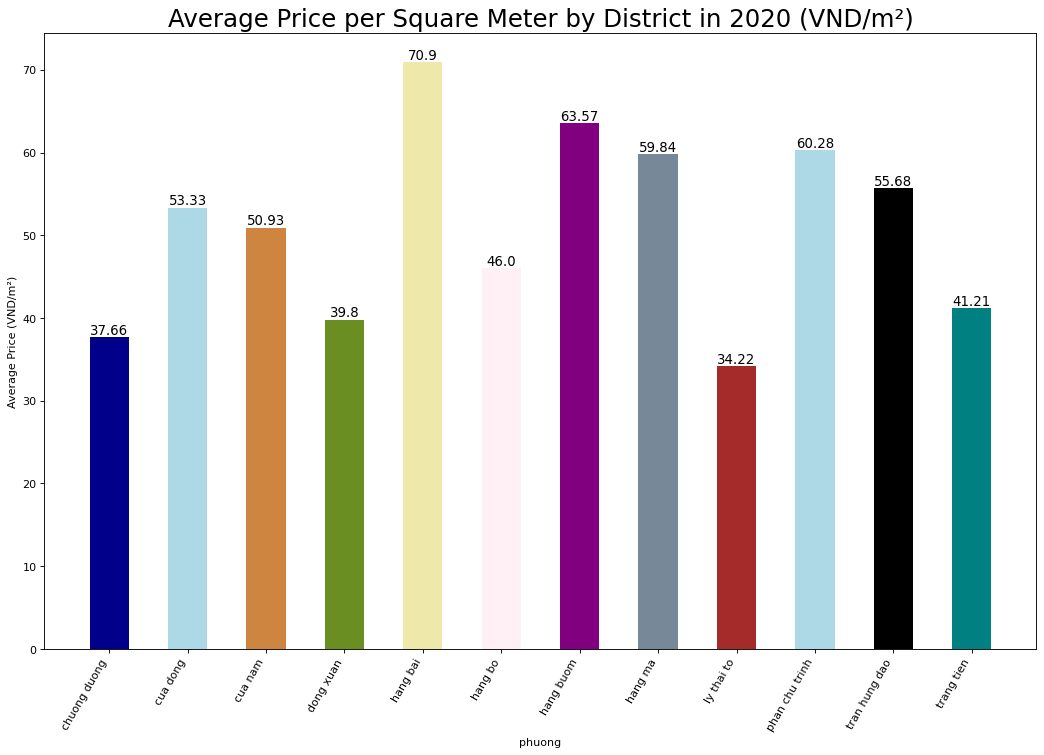

In [22]:
# Code ở đây
hk = newdf[newdf['district'] == 'hoan kiem']

df2 = hk.groupby('ward')['price_per_m2'].mean().reset_index(name='average price (VND/m²)')

n = df2['ward'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16, 10), dpi=80)
plt.bar(df2['ward'], df2['average price (VND/m²)'], color=c, width=0.5)

for i, val in enumerate(df2['average price (VND/m²)'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 12})
    
plt.gca().set_xticklabels(df2['ward'], rotation=60, horizontalalignment='right')

plt.title("Average Price per Square Meter by District in 2020 (VND/m²)", fontsize=22)
plt.ylabel('Average Price (VND/m²)')
plt.xlabel('phuong')

plt.show()

* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [ ]:
# Code ở đây


* Giá nhà đất trung bình theo dự án (VND/m2)

In [23]:
# Code ở đây
df2 = newdf.groupby('project')['price_per_m2'].mean().reset_index(name='average price (VND/m²)')

print(df2)

                       project  average price (VND/m²)
0                  6th Element               41.883108
1        A10-A14 Nam Trung Yên               29.914192
2                AQH Riverside               25.021484
3          AZ Lâm Viên Complex               27.678571
4              Amber Riverside               34.035547
..                         ...                     ...
615         Xuân Phương Garden               21.000000
616      Xuân Phương Residence               25.018071
617          Xuân Phương Tasco               21.938640
618        Yên Hòa Condominium               30.206031
619  Đồng Phát Park View Tower               23.044593

[620 rows x 2 columns]


* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

In [24]:
# Code ở đây
top_10 = newdf.groupby('investor')['price_per_m2'].mean().sort_values(ascending=False).head(10)
print(top_10)

investor
Công ty CP Đầu tư Trúc Bạch                          61.363636
Tập đoàn Sun Group                                   56.661451
Tập đoàn Jaccar Bourbon                              55.095238
Công ty Liên doanh Hà Việt – Tungshing               51.587132
Công ty TNHH Đầu tư C.T.L                            50.702950
Công ty CP Đầu tư Phát triển nhà Gia Bảo             50.680296
Công ty CP Tân Phú Long                              50.422560
Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần    48.920344
Công ty CP ACC - Thăng Long                          48.527896
Tập đoàn BRG                                         47.995171
Name: price_per_m2, dtype: float64


* Giá bất động sản phân bố theo dự án

In [ ]:
# Code ở đây

* Giá nhà đất trung bình theo hướng nhà (VND/m2)

In [ ]:
# Code ở đây

In [ ]:
# Code ở đây

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

In [ ]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)


* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

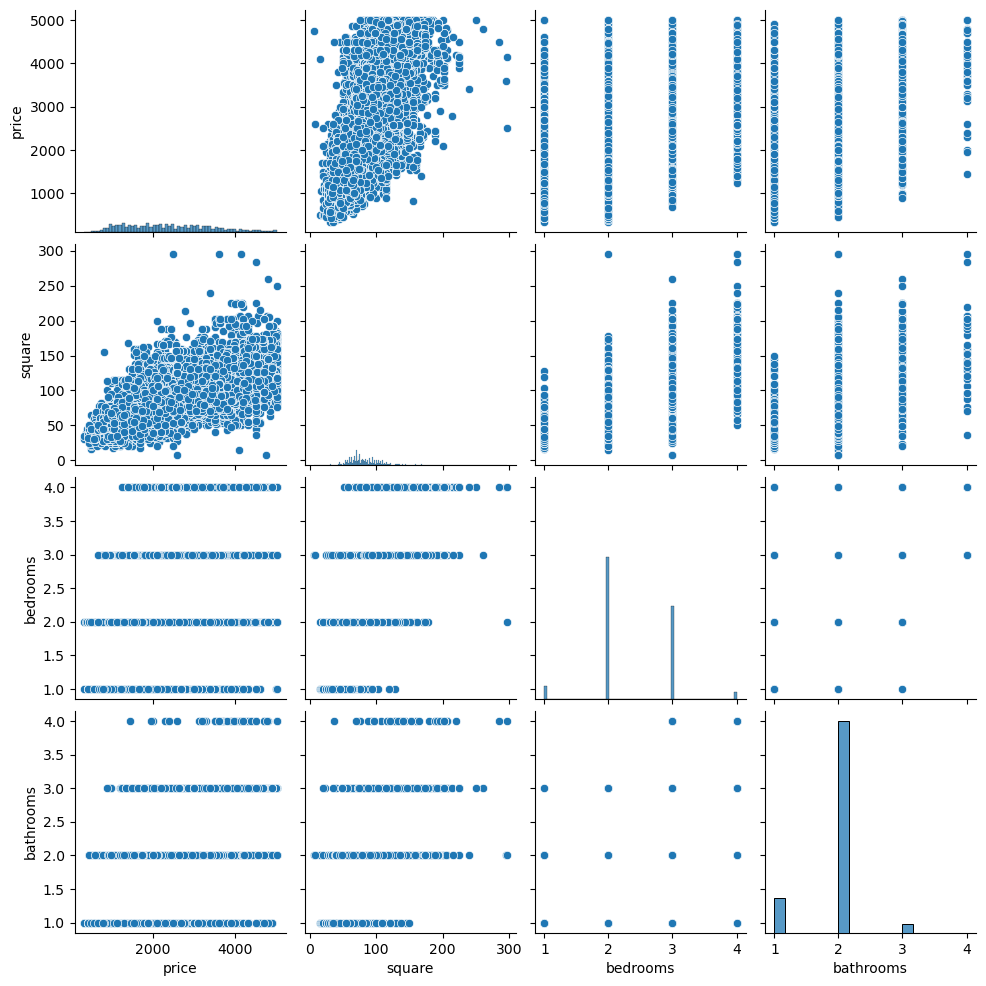

In [28]:
#Gợi ý: sns.pairplot(kind='scatter', ...)

sns.pairplot(newdf[['price', 'square', 'bedrooms', 'bathrooms']], kind='scatter')

plt.show()

4. Mật độ giá nhà trung bình theo quận 

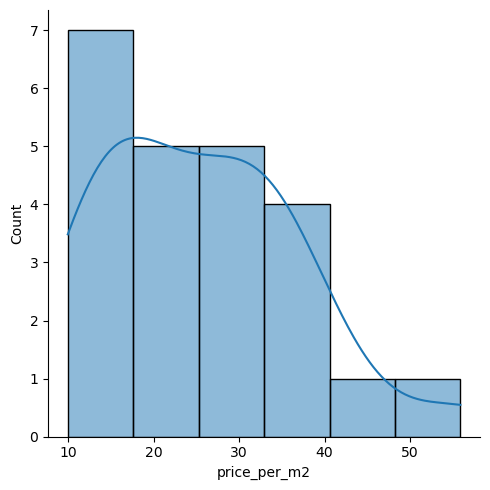

In [26]:
#Gợi ý: sns.displot()
byward = newdf.groupby('district')['price_per_m2'].mean().reset_index()

sns.displot(byward['price_per_m2'], kde = True)
plt.show()

End :))